In [353]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [354]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

TARGET_COLUMN = "horsepower"

# Load the dataset
cars_data = pd.read_csv("cars.csv")

# Check the first few rows
cars_data.head(n=5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [355]:
# get an overview of the data
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [356]:
# drop the car name column if it exists, as it is not useful for the model
if "car name" in cars_data.columns:
    cars_data = cars_data.drop("car name", axis=1)


# impute missing values
imputer = SimpleImputer(strategy="most_frequent", missing_values="?")
cars_data = pd.DataFrame(imputer.fit_transform(cars_data), columns=cars_data.columns)

# convert the data to numeric
cars_data = cars_data.apply(pd.to_numeric)

cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 25.0 KB


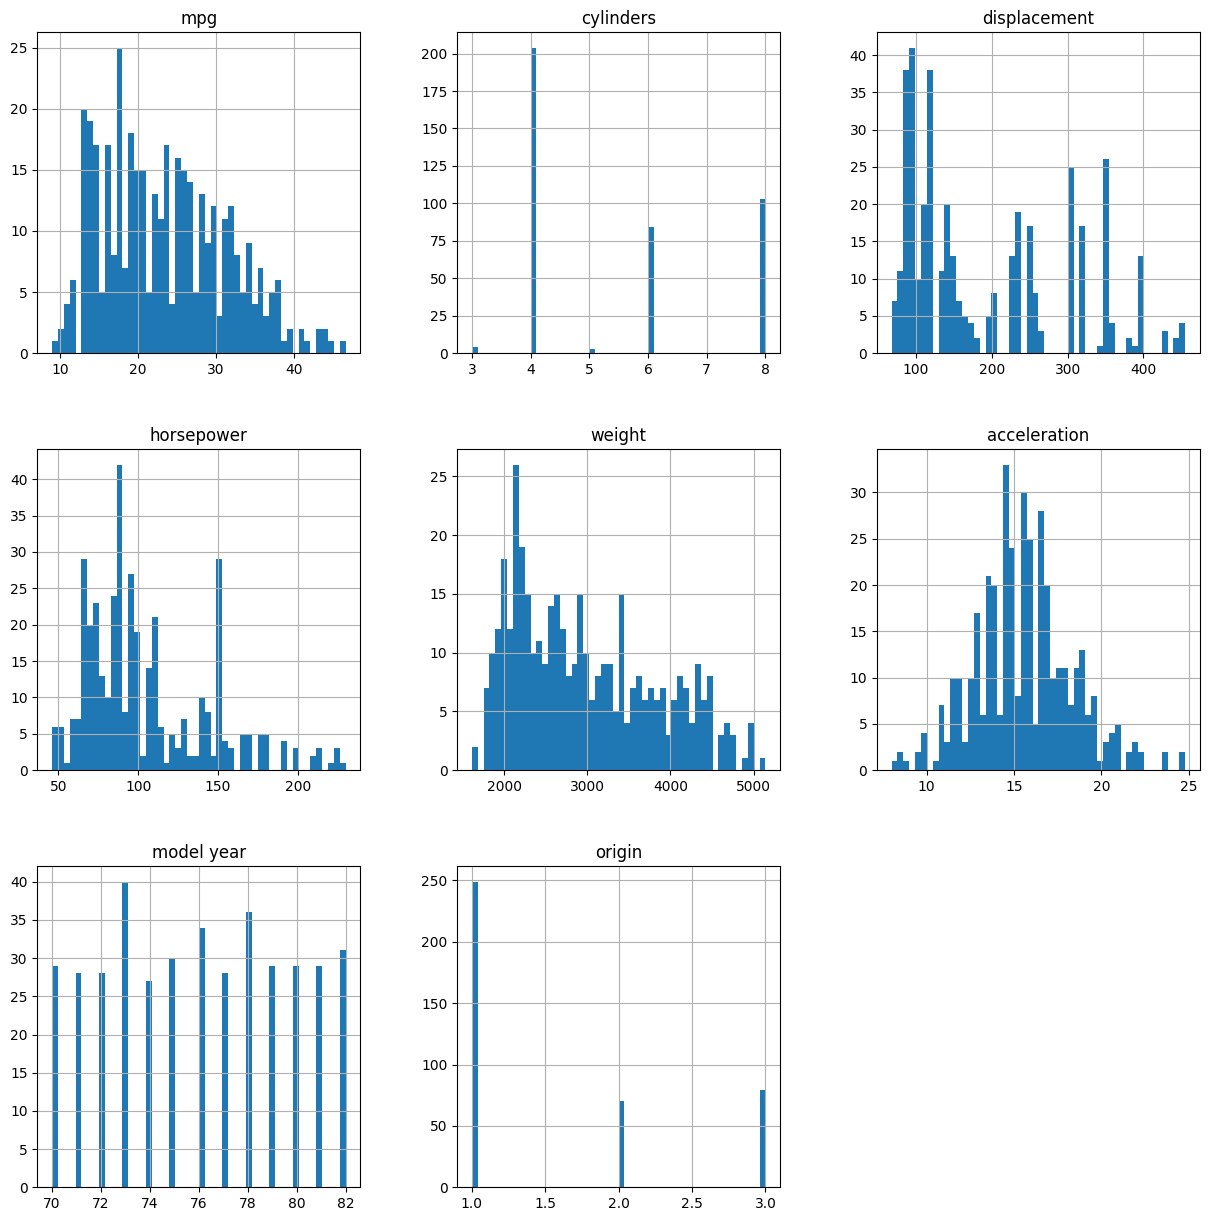

In [357]:
# visualize the data
cars_data.hist(bins=50, figsize=(15, 15))
plt.show()


In [358]:
# see TARGET_COLUMN correlation with other features
corr_matrix = cars_data.corr()
corr_matrix[TARGET_COLUMN].sort_values(ascending=False)

horsepower      1.000000
displacement    0.873330
weight          0.841770
cylinders       0.818454
model year     -0.397772
origin         -0.454271
acceleration   -0.665833
mpg            -0.753177
Name: horsepower, dtype: float64

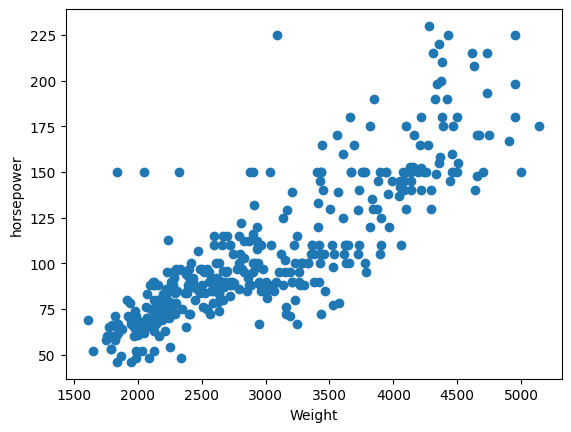

In [359]:
# weight vs TARGET_COLUMN
plt.scatter(cars_data["weight"], cars_data[TARGET_COLUMN])
plt.xlabel("Weight")
plt.ylabel(TARGET_COLUMN)
plt.show()

(array([12.,  8., 36., 43., 23., 66., 35., 21., 35.,  7.,  8.,  9., 12.,
        10., 33.,  3., 10.,  5.,  5.,  4.,  3.,  0.,  5.,  1.,  4.]),
 array([ 46.  ,  53.36,  60.72,  68.08,  75.44,  82.8 ,  90.16,  97.52,
        104.88, 112.24, 119.6 , 126.96, 134.32, 141.68, 149.04, 156.4 ,
        163.76, 171.12, 178.48, 185.84, 193.2 , 200.56, 207.92, 215.28,
        222.64, 230.  ]),
 <BarContainer object of 25 artists>)

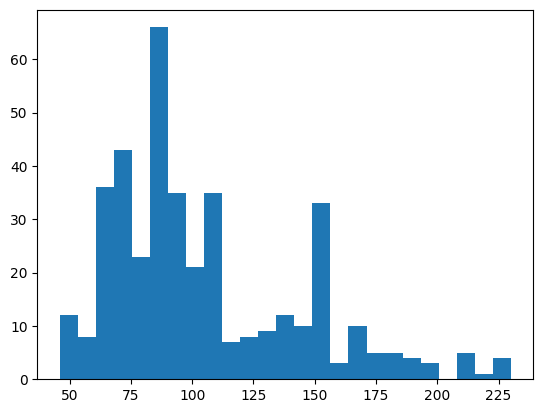

In [360]:
plt.hist(cars_data[TARGET_COLUMN], bins=25)

In [364]:
# add powertoweight ratio column, since it may help the model to predict the target column
cars_data["ptw"] = cars_data[TARGET_COLUMN] / cars_data["weight"]

## show the correlation of the new column with the target column
corr_matrix = cars_data.corr()
corr_matrix[TARGET_COLUMN].sort_values(ascending=False)

horsepower      1.000000
displacement    0.861517
weight          0.852404
cylinders       0.817491
model year     -0.378190
origin         -0.481454
acceleration   -0.673767
ptw            -0.725654
mpg            -0.790418
Name: horsepower, dtype: float64

(array([ 6.,  4.,  3.,  2., 11., 24., 32., 21., 19., 26., 48., 29., 31.,
        24., 10.,  4., 11., 18., 35.,  7., 11.,  5.,  7.,  5.,  5.]),
 array([3.8286414 , 3.89301891, 3.95739643, 4.02177395, 4.08615146,
        4.15052898, 4.2149065 , 4.27928401, 4.34366153, 4.40803904,
        4.47241656, 4.53679408, 4.60117159, 4.66554911, 4.72992663,
        4.79430414, 4.85868166, 4.92305918, 4.98743669, 5.05181421,
        5.11619173, 5.18056924, 5.24494676, 5.30932428, 5.37370179,
        5.43807931]),
 <BarContainer object of 25 artists>)

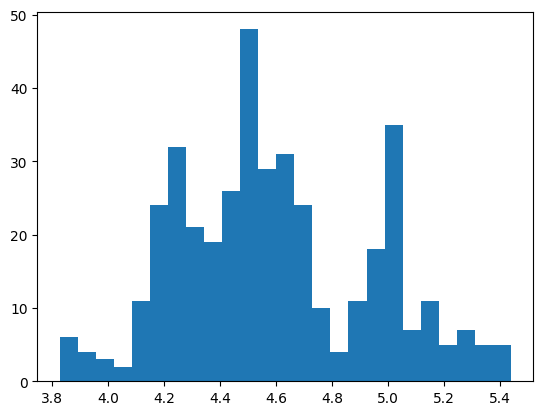

In [362]:
# log transformation of horsepower due to skewness
cars_data[TARGET_COLUMN] = np.log(cars_data[TARGET_COLUMN])

plt.hist(cars_data[TARGET_COLUMN], bins=25)

In [363]:
from sklearn.linear_model import LinearRegression


# split the data into features (X) and target variable (y)
X = cars_data.drop(TARGET_COLUMN, axis=1)  # Features
y = cars_data[TARGET_COLUMN]

# scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# create the model
model = LinearRegression()

# fit the model to the data
regr = model.fit(X_train, y_train)

# make predictions
y_pred = regr.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")#

Mean Absolute Error (MAE): 0.08780684039402918
Mean Squared Error (MSE): 0.013568504959332045
R-squared (R²): 0.8976483171448929
